In [2]:
from dataset import *
from model import *
from finetuned_model import *
import torch
import numpy as np

In [3]:
# Hyperparameters.
seed = 0
batch_size = 1  # wondering trained on some fixed slot makes difference
num_slots = 7
base_num_slots = 7
num_iterations = 3
hid_dim = 64
resolution = (128, 128)

In [4]:
test_set = CLEVR("test")
resolution = (128, 128)
model_slotattention = SlotAttentionAutoEncoder(
    resolution,
    base_num_slots,
    num_iterations,
    hid_dim,
    cnn_depth=4,
    use_trfmr=False,
    use_transformer_encoder=False,
    use_transformer_decoder=False,
).to(device)
model = SlotAttentionCompressionAutoencoder(
    model_slotattention, base_num_slots, hid_dim
).to(device)
layer = 7
model_path = f"/shared/rzhang/slot_att/results/full-token-compressor/036-full-token-compressor-slots7-layer1-ablated_layer_1_3_5.ckpt"
model.load_state_dict(torch.load(model_path)["model_state_dict"])

<All keys matched successfully>

In [5]:
model = model.to(device)
image = test_set[4]["image"]
image = image.unsqueeze(0).to(device)
recon_combined, recons, masks, slots = model.forward(image, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


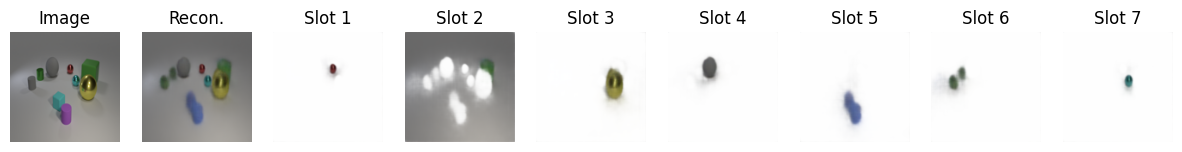

In [6]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance

fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)
image = image.permute(1, 2, 0).cpu().numpy()
recon_combined = recon_combined.permute(1, 2, 0)
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(recon_combined)
ax[1].set_title("Recon.")
for i in range(num_slots):
    picture = recons[i] * masks[i] + (1 - masks[i])
    print(picture.shape)
    ax[i + 2].imshow(picture)
    ax[i + 2].set_title("Slot %s" % str(i + 1))
for i in range(len(ax)):
    ax[i].grid(False)
    ax[i].axis("off")